<div align="center">
 <img src="http://www.di.uoa.gr/themes/corporate_lite/logo_en.png" title="Department of Informatics and Telecommunications - University of Athens" align="center" /> 
</div>

<br>

---

<div align="center"> 
  <font size="4"><b>Bachelor Thesis</b> </font>
</div>
<br>
<div align="center"> 
  <font size="5">
      <b>WinnER: A Winner-Take-All Hashing-Based Unsupervised Model <br>for Entity Resolution Problems<br></b> 
    </font>
     <br>
     <font size="3">
        Results notebook     
    </font>
</div>

---

<div align="center"> 
    <font size="4">
         <b>Konstantinos Nikoletos, BS Student</b>
     </font>
</div>
<br>
<div align="center"> 
    <font size="4">
     <b> Dr. Alex Delis</b>,  Professor NKUA <br> 
     <b> Dr. Vassilis Verikios</b>, Professor Hellenic Open University
    </font>
</div>
<br>
<div align="center"> 
    <font size="2">Athens</font>
</div>
<div align="center"> 
    <font size="2">January 2021 - Ongoing</font>
</div>


---

# __Code injection__

## Import of libraries

In [1]:
import pandas as pd
import numpy as np
import collections
import editdistance
import string
import sklearn
import pandas_read_xml as pdx
import time
import warnings
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import math
import os
import scipy.special as special
import igraph
import networkx as nx
import itertools 
import sklearn
import plotly.express as px
import logging
import sys
import optuna
import plotly

from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
from tqdm.notebook import tqdm as tqdm
from scipy.spatial.distance import directed_hausdorff,hamming
from scipy.stats._stats import _kendall_dis
from scipy.stats import spearmanr,kendalltau,pearsonr,kruskal,mannwhitneyu
from sklearn.metrics.pairwise import cosine_similarity
from nltk.metrics.distance import jaro_similarity,jaro_winkler_similarity,jaccard_distance
from sklearn.metrics import jaccard_score,accuracy_score,auc,f1_score,recall_score,precision_score,classification_report
from scipy.sparse import csr_matrix
from scipy import sparse
from scipy import stats 
from scipy.spatial.distance import euclidean,hamming,jaccard
from matplotlib.patches import Rectangle
from sklearn.metrics import ndcg_score
from datetime import datetime
from sklearn.decomposition import PCA 
from numpy.linalg import svd

# plt.style.use('seaborn-white') # plot style

ModuleNotFoundError: No module named 'optuna.visualization'

Automated refresh on the notebook

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## Main model dependency

In [ ]:
from model import WinnER, customClassificationReport, report, set_params

## Utilities

In [ ]:
from utils.classification import MMD2, myMMD2
from plot.heatmap import myHeatmap
from plot.confusion_matrix import create_ConfusionMatrix
from plot.dimension_reduction import SpaceVisualization2D, SpaceVisualization3D, SpaceVisualizationEmbeddings2D, SpaceVisualizationEmbeddings3D
from plot.heatmap import similarityProbsHeatMap, similarityProbsHeatMapWithClusters

### Dataset utils

In [ ]:
from datasets.common.create_dataset import createDataset, createTrueLabels

### GridSearch function

In [ ]:
from utils.grid_search import GridSearch

### Custom metrics

In [ ]:
from utils.metrics import spearman_footrule_distance, kendall_top_k, rbo


# __Dataset injection__

## Load data from Drive in Colab

In [ ]:
# # Opening data file
# import io
# from google.colab import drive

# drive.mount('/content/drive',force_remount=True)

# fpcora = r"/content/drive/My Drive/ERinDS/CORA.xml"
# fpcora_gold = r"/content/drive/My Drive/ERinDS/cora_gold.csv"

## Load data from disk for Jupyter

### JedAI Dirty datasets

#### CORA

In [ ]:
CORA_groundTruth = os.path.abspath("../data/coraIdDuplicates.csv")
CORA = os.path.abspath("../data/coraProfiles.csv")
CORA_groundTruth = pd.read_csv(CORA_groundTruth,sep='|',header=None,names=['id1','id2'])
CORA_groundTruth=CORA_groundTruth.sort_values(by=['id1','id2'],ignore_index=True)
CORA = pd.read_csv(CORA,sep='|')
CORA

In [ ]:
# CORA_groundTruth.head(10)

#### CENSUS

In [ ]:
CENSUS_groundTruth = os.path.abspath("../data/censusIdDuplicates.csv")
CENSUS = os.path.abspath("../data/censusProfiles.csv")
CENSUS_groundTruth = pd.read_csv(CENSUS_groundTruth,sep='|',header=None,names=['id1','id2'])
CENSUS = pd.read_csv(CENSUS,sep='|')
# CENSUS

In [ ]:
# CENSUS_groundTruth

#### CDDB

In [ ]:
CDDB_groundTruth = os.path.abspath("../data/cddbIdDuplicates.csv")
CDDB = os.path.abspath("../data/cddbProfiles.csv")
CDDB_groundTruth = pd.read_csv(CDDB_groundTruth,sep='/00000',engine='python',header=None,names=['id1','id2'])
CDDB = pd.read_csv(CDDB,sep='/00000',engine='python')
# CDDB

In [ ]:
# CDDB_groundTruth

#### DBLP - ACM

In [ ]:
ACM = os.path.abspath("../data/ACM.csv")
DBLP = os.path.abspath("../data/DBLP2.csv")
ACM_DBLP_trueValues = os.path.abspath("../data/DBLP-ACM_perfectMapping.csv")
ACM = pd.read_csv(ACM)
DBLP = pd.read_csv(DBLP, encoding='latin-1')
ACM_DBLP_trueValues = pd.read_csv(ACM_DBLP_trueValues)

#### CORA - 1st edition

In [ ]:
fpcora = os.path.abspath("../data/cora1stEdition/CORA.xml")
fpcora_gold = os.path.abspath("../data/cora1stEdition/cora_gold.csv")
CORA1 = pdx.read_xml(fpcora,['CORA', 'NEWREFERENCE'],root_is_rows=False)
CORA1['@id'] = pd.to_numeric(CORA1['@id']).subtract(1)
CORA1_groundTruth = pd.read_csv(fpcora_gold,sep=';')
CORA1_groundTruth['id1'] = pd.to_numeric(CORA1_groundTruth['id1']).subtract(1)
CORA1_groundTruth['id2'] = pd.to_numeric(CORA1_groundTruth['id2']).subtract(1)

# __CORA Evaluation__

In [ ]:
DATASET_NAME = 'CORA'

### Shuffle data

In [ ]:
CORA_shuffled = CORA.sample(frac=1).reset_index(drop=True)
# CORA_shuffled

In [ ]:
fields = [
     'address',
     'author',
     'editor',
     'institution',
     'month',
     'note',
     'pages',
     'publisher',
     'title',
     'venue',
     'volume',
     'year',
     'Unnamed: 13'
]

# fields = [
#      'author',
#      'title',
# ]


# CORA
data, true_matrix = createDataset(CORA, CORA_groundTruth, fields, 'Entity Id')

# Toy CORA
# data, true_matrix = createDataset(CORA.head(15), CORA_groundTruth.head(50), fields, 'Entity Id')

# Old CORA
# data, true_matrix = createDataset(CORA1, CORA1_groundTruth, fields, '@id')

__Clique construction for visualization purposes__

In [ ]:
labels_groundTruth, numOfObjWithoutDups, groups = createTrueLabels(CORA['Entity Id'].tolist(),CORA_groundTruth)            
data_length = [ len(x) for x in data ]

### CORA inspection

In [ ]:
specs = {
    'Objects without any duplicates' : CORA.shape[0] - sum([len(x) for x in groups]), 
    'Objects with at least one duplicate' : sum([len(x) for x in groups]),
    'Total number of objects' : CORA.shape[0], 
    'Mean size of clusters' : np.average([len(x) for x in groups]),
    'Number of ER clusters' : len(groups),
    'Dataset size' : len(data), 
    'Average length' : np.mean(data_length), 
    'Min length' : min(data_length), 
    'Max length' : max(data_length),
    'Median length' : np.median(data_length)
}
specsCoraDf = pd.DataFrame(list(specs.items()), columns=['Spec','#count'])
specsCoraDf[['#count']] = specsCoraDf[['#count']].astype(int)
specsCoraDf

#### Dataset attributes

In [ ]:
list(CORA.columns)

In [ ]:
df = pd.DataFrame({"Record index":range(0,len(data_length),1),"String length":data_length})
fig = px.bar(df, x= "Record index", y="String length", title= DATASET_NAME + " Data set string length bar plot",template='plotly_white')
fig.update_traces(marker_color='darkblue', opacity=1.0)
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.bar(range(0,len(data_length),1),data_length)
plt.xlabel("Record index")
plt.ylabel("String length")
plt.title(DATASET_NAME + " Data set string length bar plot")
fig.savefig("strlenncora.png")
plt.show()

### CORA: Jaccard execution

In [2]:
%%time

ngramms= 3                                  # If jaccard used, n-gramms are used
jaccard_withchars = True                    # n-gramms either of chars and either of words

# Prototype selection
max_numberOf_clusters= 934                  # Νumber of loops for finding representatives, it is an upper bound of clusters.
max_dissimilarityDistance= 0.5387983969                       # The threshold for the triangle inequality
distanceMetric= 'jaccard'                   # Distance metric between the strings when creating the space
prototypesFilterThr = 0.8771865206174919                   # Prototypes must differ more than that threshold

# Embedding phase
distanceMetricEmbedding = 'euclid_jaccard'  # Embedding metric

# WTA algorithm
windowSize = 41                           # Vector size for WTA algo
number_of_permutations = 4                # WTA number of permutations

# Similarity evaluation
similarityVectors = 'ranked'                  # which vectors will be passed to WTA step
similarityThreshold = 0.601449006059176                    # Similarity threshold for the final step
metric = 'pearson'                             # Similarity metric between vectors

start = time.time()
model = WinnER(
    max_numberOf_clusters= max_numberOf_clusters,
    max_dissimilarityDistance= max_dissimilarityDistance,
    windowSize= windowSize,
    similarityThreshold= similarityThreshold,
    metric=metric,
    similarityVectors=similarityVectors,
    number_of_permutations = number_of_permutations,
    distanceMetric= distanceMetric,
    distanceMetricEmbedding = distanceMetricEmbedding,
    ngramms= ngramms,
    jaccard_withchars = jaccard_withchars,
    prototypesFilterThr = prototypesFilterThr,
    verboseLevel = 1
)
model.hackForDebug(labels_groundTruth, true_matrix)
model = model.fit(data)
acc,f1,precision,recall = model.evaluate(model.mapping_matrix, true_matrix)

NameError: name 'WinnER' is not defined

### Space Visualization

In [ ]:
SpaceVisualization2D(model.Embeddings, model.prototypeArray, withPlotly=False)

In [ ]:
SpaceVisualization2D(model.Embeddings, model.prototypeArray)

In [ ]:
SpaceVisualization2D(model.Embeddings, model.prototypeArray, decompositionMenthod='MDS')

In [ ]:
SpaceVisualization3D(model.Embeddings, model.prototypeArray)

In [ ]:
SpaceVisualization3D(model.rankedVectors,model.prototypeArray, decompositionMenthod='MDS')

In [ ]:
SpaceVisualization3D(model.rankedVectors, model.prototypeArray, withPlotly = False, decompositionMenthod='MDS')

In [ ]:
SpaceVisualization3D(model.rankedVectors, model.prototypeArray, withPlotly = True, decompositionMenthod='MDS')

In [ ]:
SpaceVisualizationEmbeddings2D(
    model.Embeddings, labels_groundTruth, withPlotly=True, decompositionMenthod='PCA'
)

In [ ]:
SpaceVisualizationEmbeddings3D(
    model.rankedVectors, labels_groundTruth, withPlotly=False, decompositionMenthod='PCA'
)

In [ ]:
SpaceVisualizationEmbeddings3D(
    model.rankedVectors, labels_groundTruth, withPlotly=True, decompositionMenthod='PCA'
)

In [ ]:
SpaceVisualizationEmbeddings3D(
    model.rankedVectors, labels_groundTruth, withPlotly=True, decompositionMenthod='MDS'
)

### MMD error between distribution of Prototypes and whole Dataset

In [33]:
myMMD2(model)

MMD2:  -0.017917345658945538


## Gridsearch with Optuna

Results dataframe

In [25]:
results_dataframe = pd.DataFrame(
    columns=['maxNumberOfClusters','maxDissimilarityDistance','similarityThreshold',
             'windowSize','metric','similarityVectors',"distanceMetricEmbedding","distanceMetric",
             "numberOfPermutations","ngramms","jaccardWithChars", 
             "numOfComparisons", "diffObjectsComparedSuccess", "sameObjectsCompared", "sameObjectsComparedSuccess",
             "selectionVariance","selectedNumOfPrototypes","averageBucketSize", "prototypesTime", "embeddingsTime", "wtaTime", "similarityTime",
             'Accuracy','Precision','Recall','F1','Time']
)

In [26]:
def objective_3c(trial):
    
    ngramms = trial.suggest_categorical("ngramms",[3]) 
    jaccard_withchars = trial.suggest_categorical("jaccard_withchars", [True])
    max_numberOf_clusters = trial.suggest_int("max_numberOf_clusters", 700, 1000) 
    distanceMetric = trial.suggest_categorical("distanceMetric", ["euclid_jaccard", "jaccard"])
    max_dissimilarityDistance= trial.suggest_float("max_dissimilarityDistance", 0.3, 0.8)
    prototypesFilterThr = trial.suggest_float("prototypesFilterThr", 0.5, 0.9)
    # --- Embedding phase
    distanceMetricEmbedding = trial.suggest_categorical("distanceMetricEmbedding", ["euclid_jaccard", "jaccard"])
    # -- WTA algorithm
    windowSize= trial.suggest_int("windowSize", 25, 100) 
    number_of_permutations= trial.suggest_int("number_of_permutations", 1, 5) 
    # -- Similarity evaluation
    similarityVectors = trial.suggest_categorical("similarityVectors", ["ranked"])
    similarityThreshold = trial.suggest_float("similarityThreshold", 0.6, 0.75)
    metric = trial.suggest_categorical("metric",["kendal", "spearman"]) 
    
    start = time.time()
    model = WinnER(
        max_numberOf_clusters= max_numberOf_clusters,
        max_dissimilarityDistance= max_dissimilarityDistance,
        windowSize= windowSize,
        similarityThreshold= similarityThreshold,
        metric=metric,
        similarityVectors=similarityVectors,
        number_of_permutations = number_of_permutations,
        distanceMetric= distanceMetric,
        distanceMetricEmbedding = distanceMetricEmbedding,
        ngramms= ngramms,
        jaccard_withchars = jaccard_withchars,
        prototypesFilterThr = prototypesFilterThr,
        verboseLevel = 0,
        maxNumberOfComparisons = int((CORA.shape[0]*CORA.shape[0])/SPEED_UP_RATE)
#         disableTqdm = True
    )
    model.hackForDebug(labels_groundTruth, true_matrix)
    model = model.fit(data)
    if model == None:
        precision = 0.0
        f1 = 0.0
        recall = 0.0
    else:
        acc,f1,precision,recall = model.evaluate(model.mapping_matrix, true_matrix)
    exec_time = time.time() - start
    results_dataframe.loc[len(results_dataframe)+1] = [
        max_numberOf_clusters,max_dissimilarityDistance,similarityThreshold,
        windowSize,metric,similarityVectors,distanceMetricEmbedding,distanceMetric,
        number_of_permutations,ngramms,jaccard_withchars, 
        model.numOfComparisons, model.diffObjectsComparedSuccess, model.sameObjectsCompared, model.sameObjectsComparedSuccess,
        model.selectionVariance,model.selected_numOfPrototypes,len(model.buckets.keys()),
        model.prototypes_time, model.embeddings_time, model.wta_time, model.similarity_time, acc, precision, recall, f1, exec_time]

    return recall

def objective_3s(trial):
    
    ngramms = trial.suggest_categorical("ngramms",[3]) 
    jaccard_withchars = trial.suggest_categorical("jaccard_withchars", [False])
    max_numberOf_clusters = trial.suggest_int("max_numberOf_clusters", 200, 1000) 
    distanceMetric = trial.suggest_categorical("distanceMetric", ["euclid_jaccard"])
    max_dissimilarityDistance= trial.suggest_float("max_dissimilarityDistance", 0.1, 0.9)
    prototypesFilterThr = trial.suggest_float("prototypesFilterThr", 0.1, 0.9)
    # --- Embedding phase
    distanceMetricEmbedding = trial.suggest_categorical("distanceMetricEmbedding", ["euclid_jaccard", "l_inf"])
    # -- WTA algorithm
    windowSize= trial.suggest_int("windowSize", 25, 100) 
    number_of_permutations= trial.suggest_int("number_of_permutations", 1, 5) 
    # -- Similarity evaluation
    similarityVectors = trial.suggest_categorical("similarityVectors", ["ranked"])
    similarityThreshold = trial.suggest_float("similarityThreshold", 0.6, 0.75)
    metric = trial.suggest_categorical("metric",["kendal"]) 
    
    start = time.time()
    model = WinnER(
        max_numberOf_clusters= max_numberOf_clusters,
        max_dissimilarityDistance= max_dissimilarityDistance,
        windowSize= windowSize,
        similarityThreshold= similarityThreshold,
        metric=metric,
        similarityVectors=similarityVectors,
        number_of_permutations = number_of_permutations,
        distanceMetric= distanceMetric,
        distanceMetricEmbedding = distanceMetricEmbedding,
        ngramms= ngramms,
        jaccard_withchars = jaccard_withchars,
        prototypesFilterThr = prototypesFilterThr,
        verboseLevel = 0,
        maxNumberOfComparisons = int((CORA.shape[0]*CORA.shape[0])/SPEED_UP_RATE)
#         disableTqdm = True
    )
    model.hackForDebug(labels_groundTruth, true_matrix)
    model = model.fit(data)
    if model == None:
        precision = 0.0
        f1 = 0.0
        recall = 0.0
    else:
        acc,f1,precision,recall = model.evaluate(model.mapping_matrix, true_matrix)
    exec_time = time.time() - start
    results_dataframe.loc[len(results_dataframe)+1] = [
        max_numberOf_clusters,max_dissimilarityDistance,similarityThreshold,
        windowSize,metric,similarityVectors,distanceMetricEmbedding,distanceMetric,
        number_of_permutations,ngramms,jaccard_withchars, 
        model.numOfComparisons, model.diffObjectsComparedSuccess, model.sameObjectsCompared, model.sameObjectsComparedSuccess,
        model.selectionVariance,model.selected_numOfPrototypes,len(model.buckets.keys()),
        model.prototypes_time, model.embeddings_time, model.wta_time, model.similarity_time, acc, precision, recall, f1, exec_time]

    return recall

def objective_2c(trial):
    
    ngramms = trial.suggest_categorical("ngramms",[2]) 
    jaccard_withchars = trial.suggest_categorical("jaccard_withchars", [True])
    max_numberOf_clusters = trial.suggest_int("max_numberOf_clusters", 200, 1000) 
    distanceMetric = trial.suggest_categorical("distanceMetric", ["euclid_jaccard", "jaccard"])
    max_dissimilarityDistance= trial.suggest_float("max_dissimilarityDistance", 0.1, 0.9)
    prototypesFilterThr = trial.suggest_float("prototypesFilterThr", 0.1, 0.9)
    # --- Embedding phase
    distanceMetricEmbedding = trial.suggest_categorical("distanceMetricEmbedding", ["euclid_jaccard", "jaccard"])
    # -- WTA algorithm
    windowSize= trial.suggest_int("windowSize", 25, 100) 
    number_of_permutations= trial.suggest_int("number_of_permutations", 1, 8) 
    # -- Similarity evaluation
    similarityVectors = trial.suggest_categorical("similarityVectors", ["ranked"])
    similarityThreshold = trial.suggest_float("similarityThreshold", 0.6, 0.75)
    metric = trial.suggest_categorical("metric",["kendal"]) 
    
    start = time.time()
    model = WinnER(
        max_numberOf_clusters= max_numberOf_clusters,
        max_dissimilarityDistance= max_dissimilarityDistance,
        windowSize= windowSize,
        similarityThreshold= similarityThreshold,
        metric=metric,
        similarityVectors=similarityVectors,
        number_of_permutations = number_of_permutations,
        distanceMetric= distanceMetric,
        distanceMetricEmbedding = distanceMetricEmbedding,
        ngramms= ngramms,
        jaccard_withchars = jaccard_withchars,
        prototypesFilterThr = prototypesFilterThr,
        verboseLevel = 0,
        maxNumberOfComparisons = int((CORA.shape[0]*CORA.shape[0])/SPEED_UP_RATE)
#         disableTqdm = True
    )
    model.hackForDebug(labels_groundTruth, true_matrix)
    model = model.fit(data)
    if model == None:
        precision = 0.0
        f1 = 0.0
        recall = 0.0
    else:
        acc,f1,precision,recall = model.evaluate(model.mapping_matrix, true_matrix)
    exec_time = time.time() - start
    results_dataframe.loc[len(results_dataframe)+1] = [
        max_numberOf_clusters,max_dissimilarityDistance,similarityThreshold,
        windowSize,metric,similarityVectors,distanceMetricEmbedding,distanceMetric,
        number_of_permutations,ngramms,jaccard_withchars, 
        model.numOfComparisons, model.diffObjectsComparedSuccess, model.sameObjectsCompared, model.sameObjectsComparedSuccess,
        model.selectionVariance,model.selected_numOfPrototypes,len(model.buckets.keys()),
        model.prototypes_time, model.embeddings_time, model.wta_time, model.similarity_time, acc, precision, recall, f1, exec_time]

    return recall

def objective_2s(trial):
    
    ngramms = trial.suggest_categorical("ngramms",[2]) 
    jaccard_withchars = trial.suggest_categorical("jaccard_withchars", [False])
    max_numberOf_clusters = trial.suggest_int("max_numberOf_clusters", 200, 1000) 
    distanceMetric = trial.suggest_categorical("distanceMetric", ["euclid_jaccard", "jaccard"])
    max_dissimilarityDistance= trial.suggest_float("max_dissimilarityDistance", 0.1, 0.9)
    prototypesFilterThr = trial.suggest_float("prototypesFilterThr", 0.1, 0.9)
    # --- Embedding phase
    distanceMetricEmbedding = trial.suggest_categorical("distanceMetricEmbedding", ["euclid_jaccard", "jaccard"])
    # -- WTA algorithm
    windowSize= trial.suggest_int("windowSize", 25, 100) 
    number_of_permutations= trial.suggest_int("number_of_permutations", 1, 5) 
    # -- Similarity evaluation
    similarityVectors = trial.suggest_categorical("similarityVectors", ["initial"])
    similarityThreshold = trial.suggest_float("similarityThreshold", 0.6, 0.75)
    metric = trial.suggest_categorical("metric",["kendal", "pearson", "spearman"]) 
    
    start = time.time()
    model = WinnER(
        max_numberOf_clusters= max_numberOf_clusters,
        max_dissimilarityDistance= max_dissimilarityDistance,
        windowSize= windowSize,
        similarityThreshold= similarityThreshold,
        metric=metric,
        similarityVectors=similarityVectors,
        number_of_permutations = number_of_permutations,
        distanceMetric= distanceMetric,
        distanceMetricEmbedding = distanceMetricEmbedding,
        ngramms= ngramms,
        jaccard_withchars = jaccard_withchars,
        prototypesFilterThr = prototypesFilterThr,
        verboseLevel = 0,
        maxNumberOfComparisons = int((CORA.shape[0]*CORA.shape[0])/SPEED_UP_RATE)
#         disableTqdm = True
    )
    model.hackForDebug(labels_groundTruth, true_matrix)
    model = model.fit(data)
    if model == None:
        precision = 0.0
        f1 = 0.0
        recall = 0.0
    else:
        acc,f1,precision,recall = model.evaluate(model.mapping_matrix, true_matrix)
    exec_time = time.time() - start
    results_dataframe.loc[len(results_dataframe)+1] = [
        max_numberOf_clusters,max_dissimilarityDistance,similarityThreshold,
        windowSize,metric,similarityVectors,distanceMetricEmbedding,distanceMetric,
        number_of_permutations,ngramms,jaccard_withchars, 
        model.numOfComparisons, model.diffObjectsComparedSuccess, model.sameObjectsCompared, model.sameObjectsComparedSuccess,
        model.selectionVariance,model.selected_numOfPrototypes,len(model.buckets.keys()),
        model.prototypes_time, model.embeddings_time, model.wta_time, model.similarity_time, acc, precision, recall, f1, exec_time]

    return recall

In [27]:
results_dataframe

,maxNumberOfClusters,maxDissimilarityDistance,similarityThreshold,windowSize,metric,similarityVectors,distanceMetricEmbedding,distanceMetric,numberOfPermutations,ngramms,...,averageBucketSize,prototypesTime,embeddingsTime,wtaTime,similarityTime,Accuracy,Precision,Recall,F1,Time


In [28]:
title = "euclid_jaccard-3gramms-words"
study_name = title  # Unique identifier of the study.
storage_name = "sqlite:///{}.db".format(title)
study = optuna.create_study(directions=["maximize"], study_name=study_name, storage=storage_name, load_if_exists=True)

[I 2022-02-03 16:41:47,907] A new study created in RDB with name: euclid_jaccard-3gramms-words


In [ ]:
SPEED_UP_RATE = 9
study.optimize(objective_3s, n_trials=20, show_progress_bar=True)
results_dataframe.to_pickle("./results/" + study_name + datetime.datetime.now().strftime("_%m%d%H%M") + ".pkl")

In [56]:
studydf = study.trials_dataframe(attrs=("number", "value", "params", "state"))
# print("Best params: ", study.best_params)
# print("Best value: ", study.best_value)
# print("Best Trial: ", study.best_trial)
studydf

,number,value,params_jaccard_withchars,params_max_dissimilarityDistance,params_max_numberOf_clusters,params_number_of_permutations,params_prototypesFilterThr,params_similarityThreshold,params_windowSize,state
0,0,0.000000,True,0.473104,516,5,0.624579,0.754718,38,COMPLETE
1,1,0.000000,True,0.623397,758,3,0.644987,0.656736,84,COMPLETE
2,2,0.000000,True,0.756815,711,2,0.561361,0.617536,85,COMPLETE
3,3,0.000000,True,0.329496,926,3,0.621852,0.771797,69,COMPLETE
4,4,61.755121,True,0.493940,680,3,0.505851,0.682373,83,COMPLETE
...,...,...,...,...,...,...,...,...,...,...
125,125,68.226257,True,0.409219,597,2,0.649886,0.604314,57,COMPLETE
126,126,70.210661,True,0.499150,532,2,0.663287,0.608985,54,COMPLETE
127,127,70.414339,True,0.418894,575,2,0.653035,0.608093,42,COMPLETE
128,128,0.000000,True,0.502018,553,2,0.663735,0.608588,30,COMPLETE


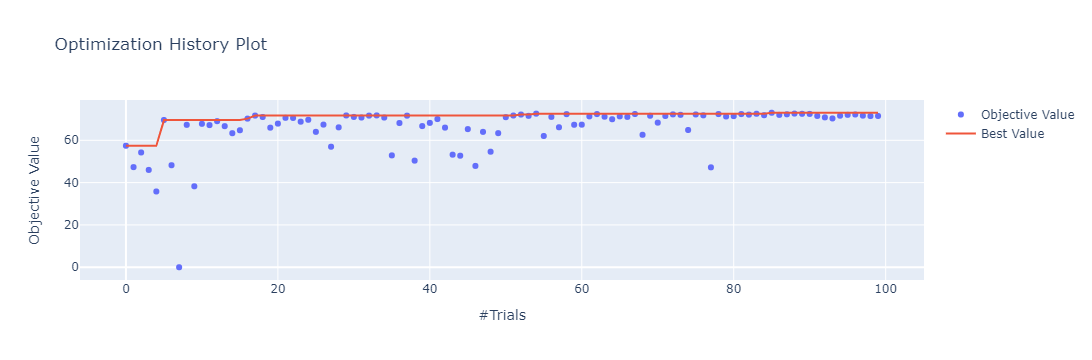

In [39]:
plot_optimization_history(study)

In [ ]:
plot_intermediate_values(study)

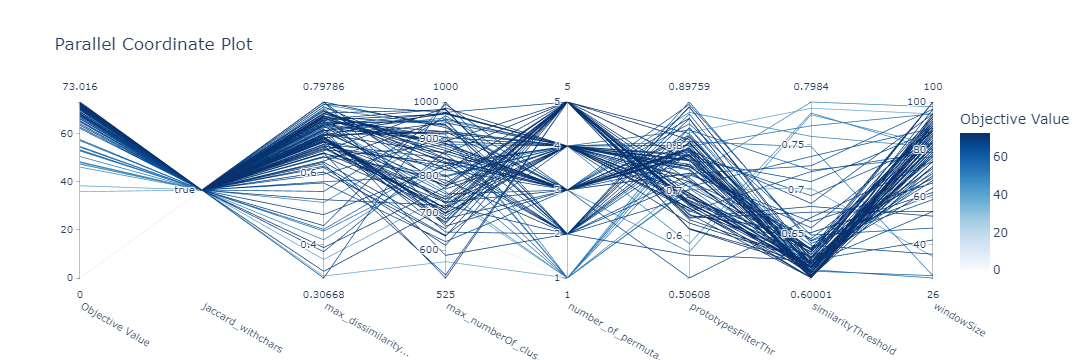

In [40]:
plot_parallel_coordinate(study)

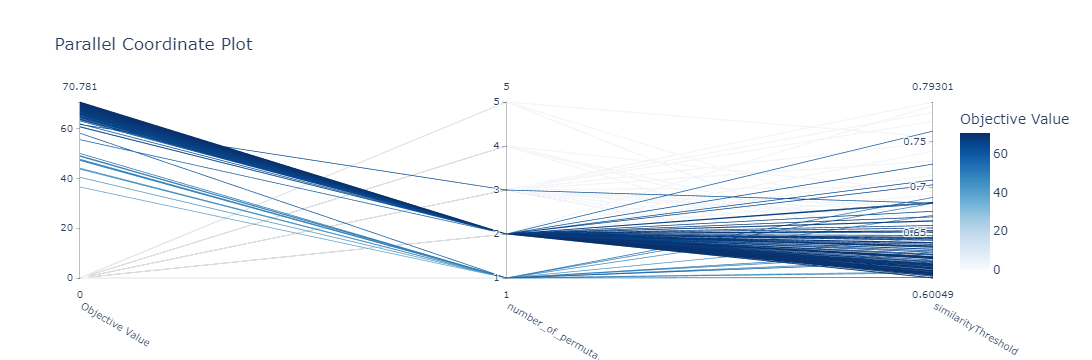

In [61]:
plot_parallel_coordinate(study, params=["number_of_permutations", "similarityThreshold"])

In [ ]:
plot_contour(study)

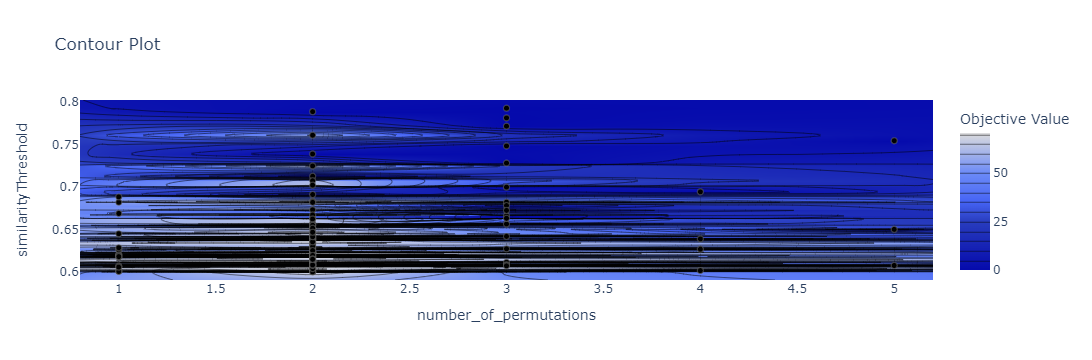

In [63]:
plot_contour(study, params=["number_of_permutations", "similarityThreshold"])

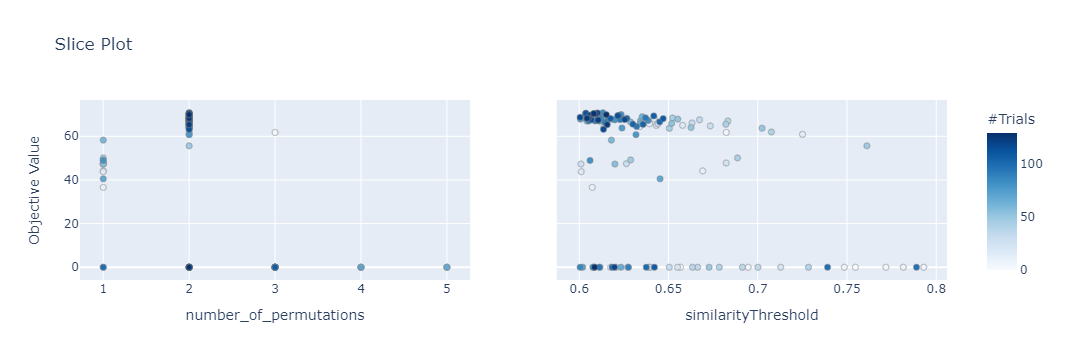

In [64]:
plot_slice(study,  params=["number_of_permutations", "similarityThreshold"])

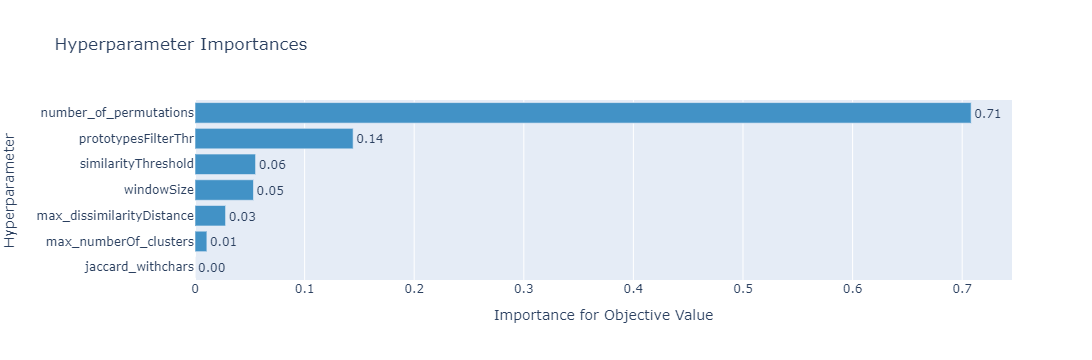

In [65]:
plot_param_importances(study)

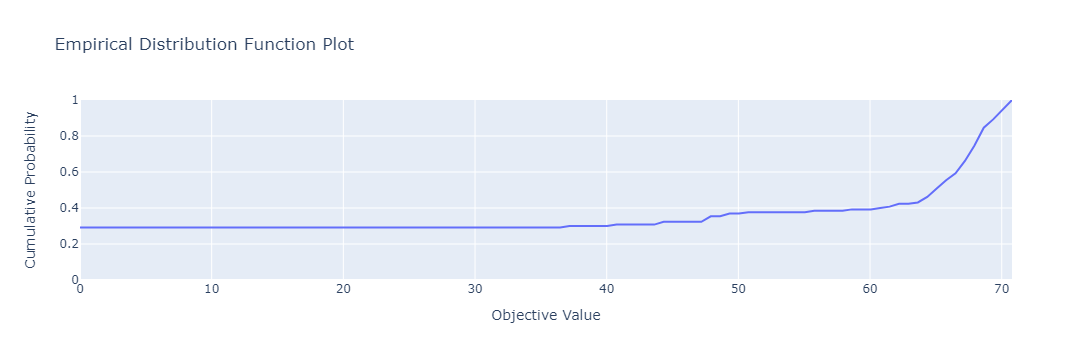

In [66]:
plot_edf(study)

In [ ]:
bestModel = set_params(study.best_params)
bestModel.hackForDebug(labels_groundTruth, true_matrix)
bestModel = bestModel.fit(data)
acc,f1,precision,recall = bestModel.evaluate(bestModel.mapping_matrix, true_matrix)

## Model final fine tunning


There are four ways to check if the predictions are right or wrong:
- __TN__ / True Negative: the case was negative and predicted negative
- __TP__ / True Positive: the case was positive and predicted positive
- __FN__ / False Negative: the case was positive but predicted negative
- __FP__ / False Positive: the case was negative but predicted positive

__Precision — What percent of your predictions were correct?__


Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.
Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)


__Recall — What percent of the positive cases did you catch?__


Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

__F1 score — What percent of positive predictions were correct?__


The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

__Support__


Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.